In [4]:
import pickle
import pprint
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [5]:

def load_pickles():
    difft_file = open("results-difft.pickle", "rb")
    gt_file = open("results-GT.pickle", "rb")

    difft = pickle.load(difft_file)
    GT = pickle.load(gt_file)

    return {"GT": GT, "difft": difft}



In [6]:


def setup(n_mut):
    res = [0] * n_mut
    count = [0] * n_mut
    mut_res = {}
    mut_count = {}

    return {"res": res, "count": count, "mut_res": mut_res, "mut_count": mut_count}


In [7]:
def remove_mut_operators(diff_results, operators):
    for diff_tool in diff_results:
        for contract in diff_results[diff_tool]:
            for i in range(len(diff_results[diff_tool][contract])):
                for r in operators:
                    if r in diff_results[diff_tool][contract][i].keys():
                        diff_results[diff_tool][contract][i].pop(r)

In [8]:
def analyze_diffs(diffs, res_dict, n_mut):
    is_GT = isinstance(next(iter(next(iter(diffs.values()))[0].values())), list)

    for contract in diffs:
        for i in range(len(diffs[contract])):
            for mut in diffs[contract][i]:
                if not diffs[contract][i][mut] == []:
                    res_dict["count"][i] += 1
                    if is_GT:
                        res_dict["res"][i] += diffs[contract][i][mut][0]
                    else:
                        res_dict["res"][i] += diffs[contract][i][mut]
                    
                    if not mut in res_dict["mut_res"].keys():
                        res_dict["mut_res"][mut] = [0] * n_mut
                        res_dict["mut_count"][mut] = [0] * n_mut 

                    if is_GT:
                        res_dict["mut_res"][mut][i] += diffs[contract][i][mut][0]
                    else:
                        res_dict["mut_res"][mut][i] += diffs[contract][i][mut] 
                    res_dict["mut_count"][mut][i] += 1    

    #Calculate average results 
    res_dict["res"] = [i / j for i, j in zip( res_dict["res"],  res_dict["count"])]

    for mut in res_dict["mut_res"]:
        for i in range(len(np.trim_zeros( res_dict["mut_res"][mut]))):
            res_dict["mut_res"][mut] = np.trim_zeros( res_dict["mut_res"][mut])
            res_dict["mut_count"][mut] = np.trim_zeros( res_dict["mut_count"][mut])
            res_dict["mut_res"][mut][i] /= res_dict["mut_count"][mut][i]

In [16]:

def analyze_diffs(diffs, res_dict, n_mut):
    is_GT = isinstance(next(iter(next(iter(diffs.values()))[0].values())), list)

    for contract in diffs:
        for i in range(len(diffs[contract])):
            for mut in diffs[contract][i]:
                if not diffs[contract][i][mut] == []:
                    res_dict["count"][i] += 1
                    if is_GT:
                        res_dict["res"][i] += diffs[contract][i][mut][0]
                    else:
                        res_dict["res"][i] += diffs[contract][i][mut]
                    
                    if not mut in res_dict["mut_res"].keys():
                        res_dict["mut_res"][mut] = [0] * n_mut
                        res_dict["mut_count"][mut] = [0] * n_mut 

                    if is_GT:
                        res_dict["mut_res"][mut][i] += diffs[contract][i][mut][0]
                    else:
                        res_dict["mut_res"][mut][i] += diffs[contract][i][mut] 
                    res_dict["mut_count"][mut][i] += 1    

    # #Calculate average results 
    # res_dict["res"] = [i / j for i, j in zip( res_dict["res"],  res_dict["count"])]

    # Calculate average results, avoiding division by zero
    res_dict["res"] = [i / j if j != 0 else 0 for i, j in zip(res_dict["res"], res_dict["count"])]


    for mut in res_dict["mut_res"]:
        for i in range(len(np.trim_zeros( res_dict["mut_res"][mut]))):
            res_dict["mut_res"][mut] = np.trim_zeros( res_dict["mut_res"][mut])
            res_dict["mut_count"][mut] = np.trim_zeros( res_dict["mut_count"][mut])
            res_dict["mut_res"][mut][i] /= res_dict["mut_count"][mut][i]

In [17]:
def print_summary(GT, difft):
    print("====================================")
    print("difftastic average: " + str(difft["res"]))
    print("successful # of mutations: ", difft["count"])
    print("Gumtree average: " + str(GT["res"]))
    print("successful # of mutations: ", GT["count"])
    print("====================================")


    plt.bar(x = [1,2,3,4,5,6,7,8,9,10], height = difft["count"], color = 'b')
    plt.xticks([1,2,3,4,5,6,7,8,9,10])
    plt.title("Number of Times X Amount of Mutations Could be Applied to Files")
    plt.xlabel("Number of Mutations")
    plt.ylabel("Successful Mutations")
    plt.show()


def print_by_mutation(res_dict):
    
    print("EDIT SCRIPT LENGTH BY MUTATION:")
    print("=====================================================")
    mut_sorted = sorted(res_dict["mut_res"].items(), key = lambda x: x[1][len(x[1])-1])
    for mut in mut_sorted:
        print(mut[0], mut[1], " counts:", res_dict["mut_res"][mut[0]])
    print("=====================================================")


In [18]:
def save_as_csv(filename):
    with open(filename, 'w') as csvfile:
        writer = csv.writer(csvfile, delimiter= " ", quotechar='|')
        for key in GT_res_dict["mut_res"]:
            writer.writerow([key] + GT_res_dict["mut_res"][key])
        writer.writerow("           ")
        for key in difft_res_dict["mut_res"]:
            writer.writerow([key] + difft_res_dict["mut_res"][key])


In [19]:

def scatter_with_avg_plot(GT, difft):
    plt.plot(range(10) ,difft["res"], label=("difft_avg"), color="blue")
    for mut in difft["mut_res"]:
        x = [i+0.985 for i in range(len(difft["mut_res"][mut]))]
        plt.scatter(x, difft["mut_res"][mut], color="blue", s=6)

    plt.plot(range(10), GT["res"], label ="GT_avg", color = "red")
    for mut in GT["mut_res"]:
        x = [i+1.015 for i in range(len(GT["mut_res"][mut]))]
        plt.scatter(x, GT["mut_res"][mut], color="red", s=6)

    plt.title("Average Edit Distance per Mutation and Tool")
    plt.ylabel("edit actions")
    plt.xlabel("# of mutations")
    plt.minorticks_on()
    plt.xticks(range(11))
    plt.legend()
    plt.show()

In [22]:

def box_plot(data, offset):
    box(data[0], offset, "r")
    box(data[1], -offset, "b")

    red_patch = mpatches.Patch(color="red", label="Gumtree")
    blue_patch = mpatches.Patch(color="blue", label="difftastic")
    plt.legend(handles=[red_patch, blue_patch])

    x = [1,2,3,4,5,6,7,8,9,10]
    plt.ylabel("edit actions")
    plt.xlabel("# of mutations")
    plt.xticks(x, labels=x)
    plt.title("Edit Script Lengths for Gumtree and Difftastic")
    plt.show()


def box(data, offset, color):
    d = [[] for _ in range(10)]
    for key in data.keys():
        for i in range(len(data[key])):
            d[i].append(data[key][i])
    
    x = [x - offset for x in [1,2,3,4,5,6,7,8,9,10]]
   
    plt.boxplot(d, widths=0.25, patch_artist=True,
        positions=x,
        showmeans=False, showfliers=False,
        medianprops={"color": "white", "linewidth": 0.25},
        boxprops={"facecolor":  color, "edgecolor": "white",
                  "linewidth": 0.2},
        whiskerprops={"color": color, "linewidth": 0.25},
        capprops={"color": color, "linewidth": 0.25})


def bar_by_mut_plot(data, offset, oper):
    
    fig, ax = plt.subplots(layout='constrained')

    bar(data[0], -offset, "r", ax, oper)
    bar(data[1], offset, "b", ax, oper)

    red_patch = mpatches.Patch(color="r", label="Gumtree")
    blue_patch = mpatches.Patch(color="b", label="difftastic")
    plt.legend(handles=[red_patch, blue_patch])
    
    plt.title("Edit Distance per Mutation Operator (5/10 mutations)")
    plt.show()

def bar(data, offset, color, subplot, oper):  
    d = []
    for key in data.keys():
        if key in oper:
            if len(data[key]) == 10:
                mut_res = [key, round(data[key][4], 1), round(data[key][9], 1)]
                d.append(mut_res)
            elif len(data[key]) >= 5:
                mut_res = [key, round(data[key][4], 1), 0]
                d.append(mut_res)
            else:
                mut_res = [key, 0, 0]
                d.append(mut_res)

    d.sort()
    x = np.arange(len(d))
    xlabels = [l[0] for l in d]
    y5 = [l[1] for l in d]
    y10 = [l[2] for l in d]

    c2 = ''
    if color == 'r':
        c2 = 'orange'
    else:
        c2 = "c"

    bar = subplot.bar(x = x + offset, width =  0.25, height = y10, color = color)#, label = "10 mutations")
    subplot.bar(x = x + offset , width =  0.25, height = y5, color = c2) #, label = "5 mutations")
    #subplot.bar_label(bar, padding=3)
    subplot.set_xticks(x, xlabels)


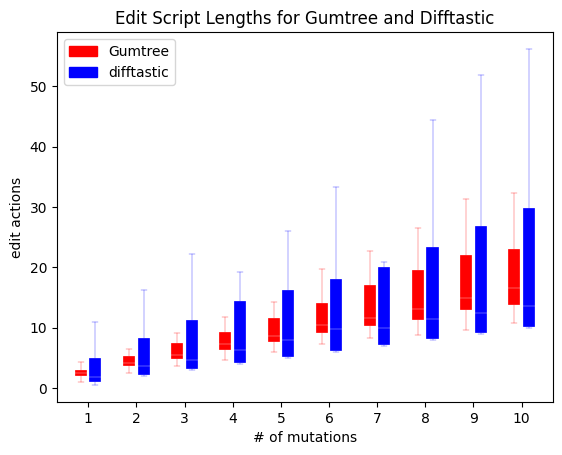

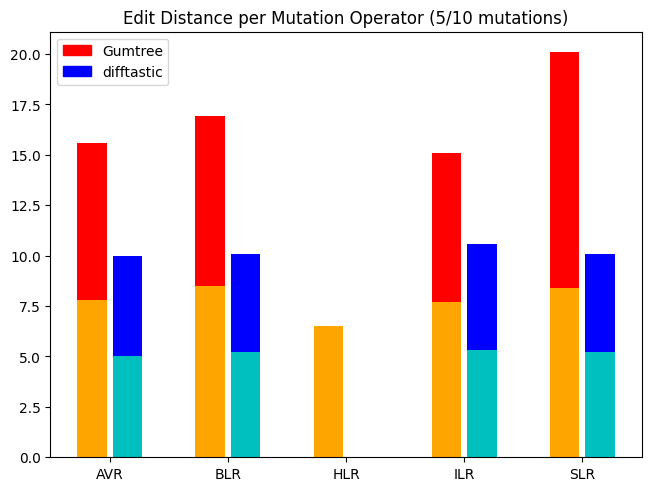

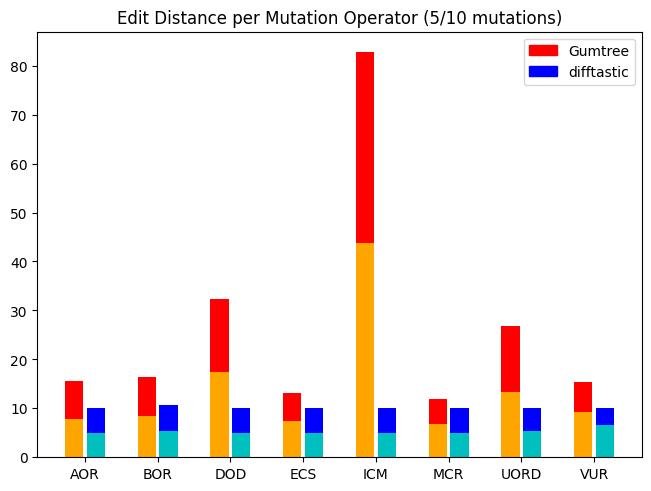

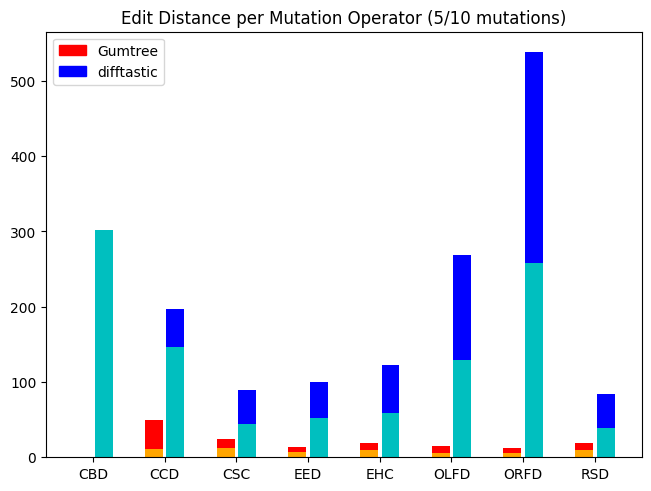

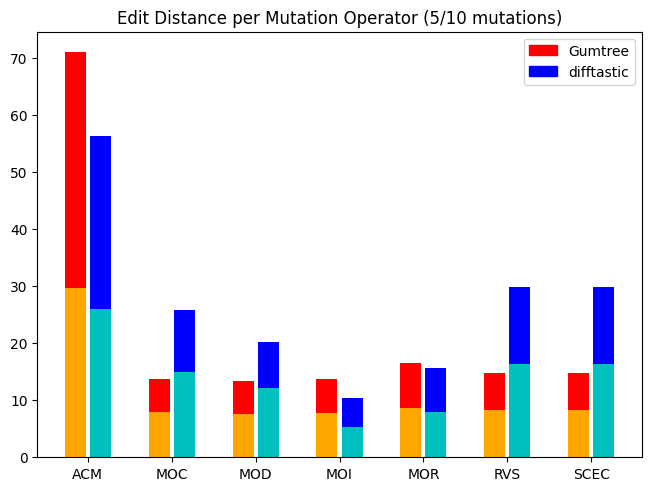

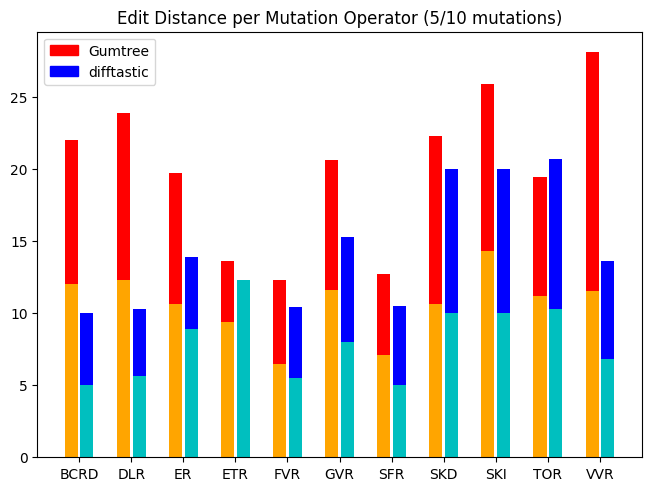

In [24]:
num_mut = 10
pickles = load_pickles()
#outliers = ["ICM", "ACM", "LSC", "CCD", "CBD", "ORFD", "OLFD", "CCD", "EHC"]
#remove_mut_operators(pickles, outliers)

GT_res_dict = setup(num_mut)
analyze_diffs(pickles["GT"], GT_res_dict, num_mut)

difft_res_dict = setup(num_mut)
analyze_diffs(pickles["difft"], difft_res_dict, num_mut)

#print_summary(GT_res_dict, difft_res_dict)
#print_by_mutation(difft_res_dict)
#print_by_mutation(GT_res_dict)

#scatter_with_avg_plot(GT_res_dict, difft_res_dict)
box_plot((GT_res_dict["mut_res"], difft_res_dict["mut_res"]), 0.15)


opers = []
opers.append( ["BLR", "HLR", "ILR", "SLR", "AVR"])
opers.append( ["AOR", "BOR", "UORD", "DOD", "ECS", "MCR", "VUR", "ICM"])
opers.append( ["CBD", "CSC", "EED", "EHC", "OLFD", "ORFD", "CCD", "RSD"])
opers.append( ["ACM", "LCS", "MOD", "MOI", "MOC", "MOR", "RVS", "SCEC"])
opers.append( ["BCRD","ER","SKI","SKD","DLR","ETR","FVR","GVR","OKD","SFR","TOR","VVR"])
for oper in opers:
    bar_by_mut_plot((GT_res_dict["mut_res"], difft_res_dict["mut_res"]), 0.15, oper)